**A PROJECT BY:**

ΕΛΕΥΘΕΡΙΑ ΕΛΛΗΝΑ 1115201800228

ΣΤΥΛΙΑΝΟΣ ΨΑΡΑ 1115201800226

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import pickle

pickle_file = './eclass_all_with_sentiment_v2.pkl'      #load pickle file on sample data of google colab
pickle = pd.read_pickle(pickle_file)
df_all_pkl= pd.DataFrame(pickle)

df_all_pkl=df_all_pkl.sample(frac=0.05)                 #0.05% of dataset for fastest execution

# 1. Text Cleaning

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string

df_all_pkl['text']= df_all_pkl['text'].str.lower()

df_all_pkl['text'] = df_all_pkl['text'].replace(to_replace='https\S+', value="", regex=True)

df_all_pkl['text'] = df_all_pkl['text'].replace('[^a-z0-9 ]', '', regex=True)

stop_words = stopwords.words('english')
df_all_pkl['text'] = df_all_pkl['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [6]:
df_all_pkl['text_split'] = df_all_pkl['text'].apply(lambda x: x.split()) 

In [7]:
lemmatizer = WordNetLemmatizer()
df_all_pkl['text_split'] = [[lemmatizer.lemmatize(w) for w in word]for word in df_all_pkl['text_split']]

p_stemmer = PorterStemmer()
df_all_pkl['text_split'] = [[p_stemmer.stem(w) for w in word]for word in df_all_pkl['text_split']]

# 2. Data Analysing

In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_all_pkl, test_size=0.2)

train.to_csv('./train.tsv', sep="\t")
test.to_csv('./test.tsv', sep="\t")

In [9]:
#i
num_pos = df_all_pkl['sentiment'].value_counts().POS
num_neg = df_all_pkl['sentiment'].value_counts().NEG
num_neu = df_all_pkl['sentiment'].value_counts().NEU

print("Positive tweets: ", num_pos)
print("Negative tweets: ", num_neg)
print("Neutral tweets: ", num_neu)

Positive tweets:  1279
Negative tweets:  1521
Neutral tweets:  8610


Text(0, 0.5, 'Counter Of Sentiments')

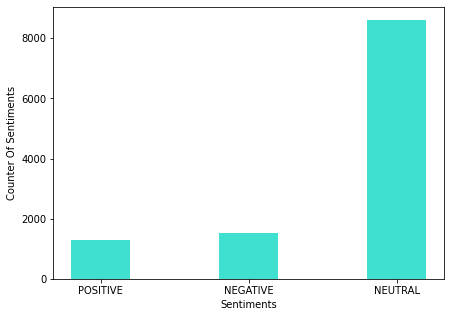

In [10]:
import matplotlib.pyplot as plt

sentiment_array = [num_pos, num_neg, num_neu]
sentiment_names_array = ["POSITIVE", "NEGATIVE", "NEUTRAL"]

fig = plt.figure(figsize = (7,5))

plt.bar(sentiment_names_array, sentiment_array, color ='turquoise', width = 0.4)
 
plt.xlabel("Sentiments")
plt.ylabel("Counter Of Sentiments")

In [11]:
#ii
import collections
import itertools

text_word_list = list(itertools.chain(*df_all_pkl['text_split']))
frequency_counter = collections.Counter(text_word_list)
most = frequency_counter.most_common(10)
print("Most common words: ", most)

Most common words:  [('vaccin', 4466), ('covaxin', 2516), ('moderna', 2492), ('dose', 1666), ('covid19', 1529), ('pfizer', 759), ('age', 758), ('18', 717), ('bbmp', 714), ('covidvaccin', 714)]


Text(0, 0.5, 'Counter Of Words')

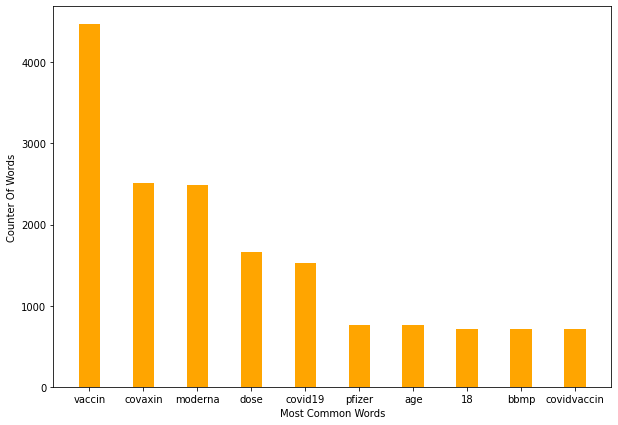

In [12]:
most_words = []
most_count = []
for word in most:
  most_words.append(word[0])
  most_count.append(word[1])
  
fig = plt.figure(figsize = (10, 7))

plt.bar(most_words, most_count, color ='orange', width = 0.4)
 
plt.xlabel("Most Common Words")
plt.ylabel("Counter Of Words")

In [13]:
#iii
positive_tweets = df_all_pkl[df_all_pkl['sentiment']=='POS']['text_split']
positive_tweets_words = list(itertools.chain(*positive_tweets))

negative_tweets = df_all_pkl[df_all_pkl['sentiment']=='NEG']['text_split']
negative_tweets_words = list(itertools.chain(*negative_tweets))

neutral_tweets = df_all_pkl[df_all_pkl['sentiment']=='NEU']['text_split']
neutral_tweets_words = list(itertools.chain(*neutral_tweets))

positive_words_frequency = collections.Counter(positive_tweets_words)
most_positive = positive_words_frequency.most_common(5)

negative_words_frequency = collections.Counter(negative_tweets_words)
most_negative =  negative_words_frequency.most_common(5)

neutral_words_frequency = collections.Counter(neutral_tweets_words)
most_neutral =  neutral_words_frequency.most_common(5)

print("Most frequent positive words: ", most_positive)
print("Most frequent negative words: ", most_negative)
print("Most frequent neutral words: ", most_neutral)


Most frequent positive words:  [('vaccin', 658), ('moderna', 344), ('covaxin', 312), ('covid19', 235), ('thank', 157)]
Most frequent negative words:  [('vaccin', 593), ('moderna', 506), ('covaxin', 189), ('covid19', 155), ('pfizer', 152)]
Most frequent neutral words:  [('vaccin', 3215), ('covaxin', 2015), ('moderna', 1642), ('dose', 1410), ('covid19', 1139)]


Text(0, 0.5, 'Counter Of Words')

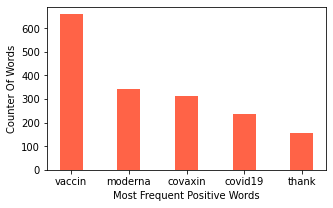

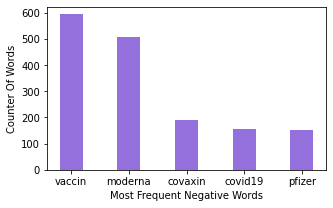

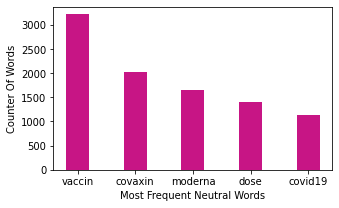

In [14]:
most_words = []
most_count = []
for word in most_positive:
  most_words.append(word[0])
  most_count.append(word[1])
  
fig = plt.figure(figsize = (5, 3))

plt.bar(most_words, most_count, color ='tomato', width = 0.4)
 
plt.xlabel("Most Frequent Positive Words")
plt.ylabel("Counter Of Words")

most_words = []
most_count = []
for word in most_negative:
  most_words.append(word[0])
  most_count.append(word[1])
  
fig = plt.figure(figsize = (5, 3))

plt.bar(most_words, most_count, color ='mediumpurple', width = 0.4)
 
plt.xlabel("Most Frequent Negative Words")
plt.ylabel("Counter Of Words")

most_words = []
most_count = []
for word in most_neutral:
  most_words.append(word[0])
  most_count.append(word[1])
  
fig = plt.figure(figsize = (5, 3))

plt.bar(most_words, most_count, color ='mediumvioletred', width = 0.4)
 
plt.xlabel("Most Frequent Neutral Words")
plt.ylabel("Counter Of Words")

In [15]:
#iv
astra = df_all_pkl.loc[df_all_pkl['text'].str.contains('astrazeneca', case=False)]['sentiment']
sentiments_astra = collections.Counter(astra)
print("Sentiments of astrazeneca:", sentiments_astra)

pf_bio_mod = df_all_pkl.loc[df_all_pkl['text'].str.contains('pfizer|biontech|moderna', case=False)]['sentiment']
sentiments_pfizer = collections.Counter(pf_bio_mod)
print("Sentiments of pfizer/biontech, moderna:", sentiments_pfizer)


Sentiments of astrazeneca: Counter({'NEU': 230, 'NEG': 73, 'POS': 32})
Sentiments of pfizer/biontech, moderna: Counter({'NEU': 2012, 'NEG': 570, 'POS': 451})


Text(0, 0.5, 'Counter Of Neutrals')

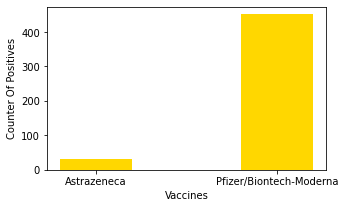

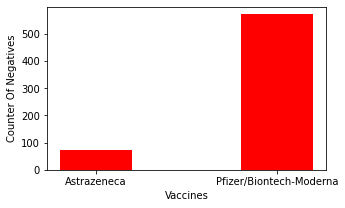

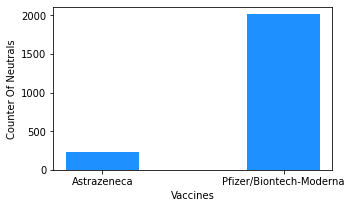

In [16]:
pos = []
neg = []
neu = []

for word in sentiments_astra.most_common(3):
  if word[0] == 'POS': 
    pos.append(word[1])
  elif word[0] == 'NEG':
    neg.append(word[1])
  else:
    neu.append(word[1])

for word in sentiments_pfizer.most_common(3):
  if word[0] == 'POS': 
    pos.append(word[1])
  elif word[0] == 'NEG':
    neg.append(word[1])
  else:
    neu.append(word[1])

vaccine_names = ["Astrazeneca", "Pfizer/Biontech-Moderna"]

fig = plt.figure(figsize = (5, 3))
plt.bar(vaccine_names, pos, color ='gold', width = 0.4)
plt.xlabel("Vaccines")
plt.ylabel("Counter Of Positives")

fig = plt.figure(figsize = (5, 3))
plt.bar(vaccine_names, neg, color ='red', width = 0.4)
plt.xlabel("Vaccines")
plt.ylabel("Counter Of Negatives")

fig = plt.figure(figsize = (5, 3))
plt.bar(vaccine_names, neu, color ='dodgerblue', width = 0.4)
plt.xlabel("Vaccines")
plt.ylabel("Counter Of Neutrals")

In [17]:
#v.
df_all_pkl['date'] = pd.to_datetime(df_all_pkl['date'])
date = df_all_pkl.groupby(df_all_pkl.date.dt.month)['text'].count()
print(date)

date
1      150
2      531
3     1306
4     1365
5      918
6     1814
7     1398
8     1491
9      800
10     864
11     688
12      85
Name: text, dtype: int64


Text(0, 0.5, 'Counter Of Words')

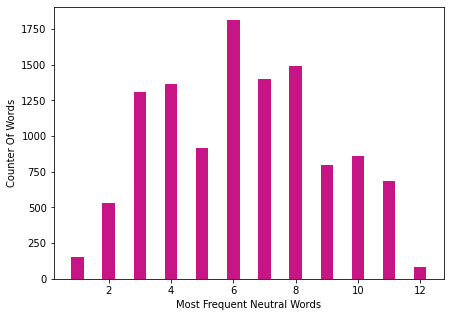

In [18]:
fig = plt.figure(figsize = (7, 5))

plt.bar(range(1,13), list(date), color ='mediumvioletred', width = 0.4)
 
plt.xlabel("Most Frequent Neutral Words")
plt.ylabel("Counter Of Words")

Παρατηρούμε ότι τα περισσότερα tweets είχαν γίνει τον Ιούνιο του 2021.

Σημαντικά γεγονότα που σημειώθηκαν ήταν:

Παγκοσμίως υπήρξε ραγδαία αύξηση του εμβολιασμού μετά από παρατήρηση πολλαπλών θανάτων ανεμβολίαστων. 

Στην Ελλάδα βγήκε πρωτόκολλο για επανεκκίνηση της εστίασης και των κέντρων διασκέδασης, κυρίως για εμβολιασμένους.

vi.

Σημαντικές Παρατηρήσεις:

1. Τον Δεκέμβριο έχουμε μείωση ενασχόλησης με τα κορονοιο-tweets λόγω του γιορτινού κλίματος και της ανάγκης του κόσμου να ξεφύγει από τον Κορονοιό.

2. Επίσης βλέπουμε ότι ο κόσμος ασχολείται επι το πλείστον με το εμβόλιο και ποιο εμβόλιο θεωρείται το καλύτερο.

Οι παραπάνω παρατηρήσεις φαίνονται στις παραπάνω γραφικές.

# 3. Vectorization 
**(part 4 is included)**

In [19]:
train_file = pd.read_csv('./train.tsv', sep="\t", lineterminator='\n')
test_file = pd.read_csv('./test.tsv', sep="\t",  lineterminator='\n')

train_df = pd.DataFrame(train_file)
test_df = pd.DataFrame(test_file)

##BAG OF WORDS

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=100)
X_train = vectorizer.fit_transform(train_df['text_split'].values.astype('U'))
train_words = vectorizer.get_feature_names_out()
X_train = X_train.toarray()

X_test = vectorizer.transform(test_df['text_split'].values.astype('U'))
test_words = vectorizer.get_feature_names_out()
X_test = X_test.toarray()

train_words_df = pd.DataFrame(columns = train_words)
test_words_df = pd.DataFrame(columns = test_words)

for i in range(0, X_train.shape[0]):
  words_df = pd.Series(X_train[i], index = train_words_df.columns)
  train_words_df = train_words_df.append(words_df, ignore_index=True)

train_words_df['sentiment'] = train_df['sentiment']

for i in range(0, X_test.shape[0]):
  words_df = pd.Series(X_test[i], index = test_words_df.columns)
  test_words_df= test_words_df.append(words_df, ignore_index=True)

test_words_df['sentiment'] = test_df['sentiment']

# train_words_df.to_pickle('./vector_train_1.pkl')
# pkl_to_csv = pd.read_pickle('./vector_train_1.pkl')
# pkl_to_csv.to_csv('./vector_train_1.csv', sep='\t')

# test_words_df.to_pickle('./vector_test_1.pkl')
# pkl_to_csv = pd.read_pickle('./vector_test_1.pkl')
# pkl_to_csv.to_csv('./vector_test_1.csv', sep='\t')

### 4. Classifiers for Bag of Words


####SVM FOR BOW

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
 
classifier_svm = GridSearchCV(SVC(), {}, cv = 10)

classifier_svm.fit(X_train, train_df['sentiment'])

prediction = classifier_svm.predict(X_test)

In [22]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

print("Accuracy for BOW with SVM: ", accuracy_score(prediction, test_df['sentiment']))
print("Precision for BOW with SVM: ", precision_score(prediction, test_df['sentiment'], average='macro'))
print("Recall for BOW with SVM: ", recall_score(prediction, test_df['sentiment'], average='macro'))
print("F-Measure for BOW with SVM: ", f1_score(prediction, test_df['sentiment'], average='macro'))

Accuracy for BOW with SVM:  0.7695004382120947
Precision for BOW with SVM:  0.4209923316515182
Recall for BOW with SVM:  0.7266091374031438
F-Measure for BOW with SVM:  0.43841866971359417


####RANDOM FORESTS FOR BOW

In [23]:
from sklearn.ensemble import RandomForestClassifier

classifier_forest = GridSearchCV(RandomForestClassifier() , {}, cv= 10)

classifier_forest.fit(X_train, train_df['sentiment'])

prediction = classifier_forest.predict(X_test) 

In [24]:
print("Accuracy for BOW with Random Forests: ", accuracy_score(prediction, test_df['sentiment']))
print("Precision for BOW with Random Forests: ", precision_score(prediction, test_df['sentiment'], average='macro'))
print("Recall for BOW with Random Forests: ", recall_score(prediction, test_df['sentiment'], average='macro'))
print("F-Measure for BOW with Random Forests: ", f1_score(prediction, test_df['sentiment'], average='macro'))

Accuracy for BOW with Random Forests:  0.7497808939526731
Precision for BOW with Random Forests:  0.4647047870956789
Recall for BOW with Random Forests:  0.5738351200796432
F-Measure for BOW with Random Forests:  0.4921306211284056


####KNN FOR BOW

In [25]:
from sklearn.neighbors import KNeighborsClassifier
  
classifier_knn = GridSearchCV(KNeighborsClassifier(), dict(n_neighbors=range(1, 10)), cv=10)

classifier_knn.fit(X_train, train_df['sentiment'])

prediction = classifier_knn.predict(X_test)

In [26]:
print("Accuracy for BOW with KNN: ", accuracy_score(prediction, test_df['sentiment']))
print("Precision for BOW with KNN: ", precision_score(prediction, test_df['sentiment'], average='macro'))
print("Recall for BOW with KNN: ", recall_score(prediction, test_df['sentiment'], average='macro'))
print("F-Measure for BOW with KNN: ", f1_score(prediction, test_df['sentiment'], average='macro'))

Accuracy for BOW with KNN:  0.7484662576687117
Precision for BOW with KNN:  0.3931000697274107
Recall for BOW with KNN:  0.5784106697870262
F-Measure for BOW with KNN:  0.3995790308887887


##TF-IDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=100)

X_train = vectorizer.fit_transform(train_df['text'].values.astype('U'))
X_test = vectorizer.fit_transform(test_df['text'].values.astype('U'))

###4. Classifiers for TF-IDF

####SVM FOR TF-IDF

In [28]:
classifier_svm = GridSearchCV(SVC(), {}, cv = 10)

classifier_svm.fit(X_train, train_df['sentiment'])

prediction = classifier_svm.predict(X_test)

In [29]:
print("Accuracy for TF-IDF with SVM: ", accuracy_score(prediction, test_df['sentiment']))
print("Precision for TF-IDF with SVM: ", precision_score(prediction, test_df['sentiment'], average='macro'))
print("Recall for TF-IDF with SVM: ", recall_score(prediction, test_df['sentiment'], average='macro'))
print("F-Measure for TF-IDF with SVM: ", f1_score(prediction, test_df['sentiment'], average='macro'))

Accuracy for TF-IDF with SVM:  0.7397020157756354
Precision for TF-IDF with SVM:  0.3386312712853427
Recall for TF-IDF with SVM:  0.37395999137091646
F-Measure for TF-IDF with SVM:  0.3019399734329758


####RANDOM FORESTS FOR TF-IDF

In [30]:
classifier_forest = GridSearchCV(RandomForestClassifier() , {}, cv= 10)

classifier_forest.fit(X_train, train_df['sentiment'])

prediction = classifier_forest.predict(X_test) 

In [31]:
print("Accuracy for TF-IDF with Random Forests: ", accuracy_score(prediction, test_df['sentiment']))
print("Precision for TF-IDF with Random Forests: ", precision_score(prediction, test_df['sentiment'], average='macro'))
print("Recall for TF-IDF with Random Forests: ", recall_score(prediction, test_df['sentiment'], average='macro'))
print("F-Measure for TF-IDF with Random Forests: ", f1_score(prediction, test_df['sentiment'], average='macro'))

Accuracy for TF-IDF with Random Forests:  0.7226117440841368
Precision for TF-IDF with Random Forests:  0.34081096419187334
Recall for TF-IDF with Random Forests:  0.37844974948423227
F-Measure for TF-IDF with Random Forests:  0.31731474759208167


####KNN FOR TF-IDF

In [32]:
classifier_knn = GridSearchCV(KNeighborsClassifier(), dict(n_neighbors=range(1, 10)), cv=10)

classifier_knn.fit(X_train, train_df['sentiment'])

prediction = classifier_knn.predict(X_test)

In [33]:
print("Accuracy for TF-IDF with KNN: ", accuracy_score(prediction, test_df['sentiment']))
print("Precision for TF-IDF with KNN: ", precision_score(prediction, test_df['sentiment'], average='macro'))
print("Recall for TF-IDF with KNN: ", recall_score(prediction, test_df['sentiment'], average='macro'))
print("F-Measure for TF-IDF with KNN: ", f1_score(prediction, test_df['sentiment'], average='macro'))

Accuracy for TF-IDF with KNN:  0.6932515337423313
Precision for TF-IDF with KNN:  0.3296636143513464
Recall for TF-IDF with KNN:  0.35029286952363875
F-Measure for TF-IDF with KNN:  0.31133912678818065


##WORD EMBEDDINGS

In [34]:
import gensim

tokenized_train_df = train_df['text'].apply(lambda x: str(x).split()) 
tokenized_test_df = test_df['text'].apply(lambda x: str(x).split())

model_w2v = gensim.models.Word2Vec(tokenized_train_df, size=200, window=5, min_count=2, sg = 1, hs = 0, negative = 10, workers= 2, seed = 34)

model_w2v.train(tokenized_train_df, total_examples = len(tokenized_train_df), epochs=100)

(7279403, 9611700)

In [35]:
import numpy as np

train_vectors = []

for row in tokenized_train_df:
  total = np.zeros(200)
  vector = np.zeros(200)
  for word in row:
    if word in model_w2v.wv:
      total = total + model_w2v.wv[word]
  vector = [item/len(row) for item in total]
  train_vectors.extend(vector)

# train_df['vectors'] = train_vectors

train_vectors = np.reshape(train_vectors, (len(train_df['text']), 200))
X_train = train_vectors

# vector_df = train_df.filter(['vectors', 'sentiment'])
# vector_df.to_pickle('./vector_train_3.pkl')
# pkl_to_csv_train = pd.read_pickle('./vector_train_3.pkl')
# pkl_to_csv_train.to_csv('./vector_train_3.csv', sep='\t')

test_vectors = []

for row in tokenized_test_df:
  total = np.zeros(200)
  vector = np.zeros(200)
  for word in row:
    if word in model_w2v.wv:
      total = total + model_w2v.wv[word]
  vector = [item/len(row) for item in total]
  test_vectors.extend(vector)

# test_df['vectors'] = test_vectors

test_vectors = np.reshape(test_vectors, (len(test_df['text']), 200))
X_test = test_vectors

# vector_df = test_df.filter(['vectors', 'sentiment'])
# vector_df.to_pickle('./vector_tst_3.pkl')
# pkl_to_csv_test = pd.read_pickle('./vector_tst_3.pkl')
# pkl_to_csv_test.to_csv('./vector_test_3.csv', sep='\t')

###4. Classifiers for Word Embeddings

####SVM FOR WORD EMBEDDINGS

In [36]:
classifier_svm = GridSearchCV(SVC(), {}, cv = 10)

classifier_svm.fit(X_train, train_df['sentiment'])

prediction = classifier_svm.predict(X_test)

In [37]:
print("Accuracy for Word Embeddings with SVM: ", accuracy_score(prediction, test_df['sentiment']))
print("Precision for Word Embeddings with SVM: ", precision_score(prediction, test_df['sentiment'], average='macro'))
print("Recall for Word Embeddings with SVM: ", recall_score(prediction, test_df['sentiment'], average='macro', zero_division=0))
print("F-Measure for Word Embeddings with SVM: ", f1_score(prediction, test_df['sentiment'], average='macro'))

Accuracy for Word Embeddings with SVM:  0.782646801051709
Precision for Word Embeddings with SVM:  0.44088394165945527
Recall for Word Embeddings with SVM:  0.8295538698393211
F-Measure for Word Embeddings with SVM:  0.47503020948839186


####RANDOM FORESTS FOR WORD EMBEDDINGS

In [38]:
classifier_forest = GridSearchCV(RandomForestClassifier() , {}, cv= 10)

classifier_forest.fit(X_train, train_df['sentiment'])

prediction = classifier_forest.predict(X_test) 

In [39]:
print("Accuracy for Word Embeddings with Random Forests: ", accuracy_score(prediction, test_df['sentiment']))
print("Precision for Word Embeddings with Random Forests: ", precision_score(prediction, test_df['sentiment'], average='macro'))
print("Recall for Word Embeddings with Random Forests: ", recall_score(prediction, test_df['sentiment'], average='macro'))
print("F-Measure for Word Embeddings with Random Forests: ", f1_score(prediction, test_df['sentiment'], average='macro'))

Accuracy for Word Embeddings with Random Forests:  0.7598597721297108
Precision for Word Embeddings with Random Forests:  0.3675287888966628
Recall for Word Embeddings with Random Forests:  0.8055915502463386
F-Measure for Word Embeddings with Random Forests:  0.35114864348595853


####KNN FOR WORD EMBEDDINGS

In [40]:
classifier_knn = GridSearchCV(KNeighborsClassifier(), dict(n_neighbors=range(1, 10)), cv=10)

classifier_knn.fit(X_train, train_df['sentiment'])

prediction = classifier_knn.predict(X_test)

In [41]:
print("Accuracy for Word Embeddings with KNN: ", accuracy_score(prediction, test_df['sentiment']))
print("Precision for Word Embeddings with KNN: ", precision_score(prediction, test_df['sentiment'], average='macro'))
print("Recall for Word Embeddings with KNN: ", recall_score(prediction, test_df['sentiment'], average='macro'))
print("F-Measure for Word Embeddings with KNN: ", f1_score(prediction, test_df['sentiment'], average='macro'))

Accuracy for Word Embeddings with KNN:  0.7743207712532866
Precision for Word Embeddings with KNN:  0.462608452790781
Recall for Word Embeddings with KNN:  0.689244529627855
F-Measure for Word Embeddings with KNN:  0.5006571239631552


#5. Latent Dirichltet Allocation


In [50]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

id2word = corpora.Dictionary(df_all_pkl['text_split'])

texts = df_all_pkl['text_split']

corpus = [id2word.doc2bow(text) for text in texts]

In [51]:
coherence_score = []
for i in range(10, 60, 10):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=i, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
  doc_lda = lda_model[corpus]
  coherence_model_lda = CoherenceModel(model=lda_model, texts=df_all_pkl['text_split'], dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  coherence_score.append(coherence_lda)

Text(0, 0.5, 'Number of Topics')

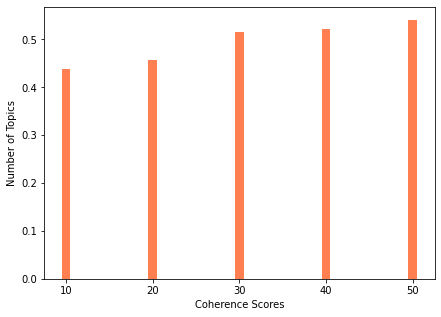

In [52]:
fig = plt.figure(figsize = (7,5))

plt.bar(range(10, 60, 10), coherence_score,  color ='coral', width = 1)
 
plt.xlabel("Coherence Scores")
plt.ylabel("Number of Topics")

In [ ]:
!pip install pyLDAvis

In [54]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
19    -0.029579 -0.118103       1        1  6.683101
42    -0.058921 -0.372731       2        1  5.894319
8     -0.066908 -0.234925       3        1  4.896339
20    -0.019128 -0.087034       4        1  3.649923
12    -0.015620 -0.080162       5        1  3.025730
3     -0.014040 -0.246804       6        1  2.996777
36    -0.314742  0.082767       7        1  2.928102
33    -0.274381  0.027829       8        1  2.558850
27     0.007496 -0.013736       9        1  2.421650
25    -0.248281  0.084080      10        1  2.204548
9      0.024583  0.001080      11        1  2.157701
39     0.022560  0.011022      12        1  2.142569
2      0.024933 -0.009890      13        1  2.119404
10     0.025865  0.001334      14        1  2.047382
37     0.013547 -0.007701      15        1  2.042772
43     0.024572 -0.000602      16        1  2.003438
11     0.020524  0.004335      17        1  1.880170
40    -0.219429  0.087133      18        1  1.795242
14    -0.143618  0.058047      19        1  1.788367
49     0.027276  0.000937      20        1  1.775596
21     0.031857  0.023419      21        1  1.718242
22     0.025238  0.009131      22        1  1.683933
23     0.035800  0.013958      23        1  1.683805
18     0.036065  0.016698      24        1  1.640870
31     0.043225  0.031344      25        1  1.618168
32     0.031766  0.019676      26        1  1.587163
5      0.039271  0.015512      27        1  1.570757
30     0.044130  0.023046      28        1  1.531451
38     0.036301  0.020373      29        1  1.525119
48     0.037666  0.028430      30        1  1.512756
0      0.049844  0.036132      31        1  1.496398
7      0.041990  0.020794      32        1  1.470321
24     0.041827  0.028543      33        1  1.470248
1      0.034288  0.003281      34        1  1.446515
6      0.038207  0.032053      35        1  1.419390
29     0.039503  0.028770      36        1  1.418597
13     0.040644  0.013433      37        1  1.414681
35     0.030398  0.023347      38        1  1.412517
47     0.041983  0.024161      39        1  1.411363
45     0.043754  0.036643      40        1  1.399940
44     0.045044  0.036534      41        1  1.379318
4      0.046014  0.039431      42        1  1.367268
15     0.042612  0.035647      43        1  1.366266
34     0.046119  0.032379      44        1  1.359109
26     0.030425  0.017898      45        1  1.321701
17     0.041558  0.027200      46        1  1.287389
46     0.049254  0.044369      47        1  1.261779
41     0.046874  0.047403      48        1  1.176484
16     0.050197  0.043009      49        1  1.090150
28     0.051436  0.040511      50        1  0.946318, topic_info=         Term         Freq        Total Category  logprob  loglift
9      vaccin  4339.000000  4339.000000  Default  30.0000  30.0000
7     moderna  2449.000000  2449.000000  Default  29.0000  29.0000
48    covaxin  2307.000000  2307.000000  Default  28.0000  28.0000
119   covid19  1523.000000  1523.000000  Default  27.0000  27.0000
4        dose  1251.000000  1251.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
8651   thatll     6.461796     7.326321  Topic50  -5.1674   4.5348
8167     viol     6.459871     7.324406  Topic50  -5.1677   4.5347
2562     hosp    36.979484    64.579984  Topic50  -3.4229   4.1028
301    canada     9.115376   120.405918  Topic50  -4.8233   2.0794
307   ontario     7.626241    78.860882  Topic50  -5.0017   2.3243

[1572 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
3304      37  0.948982           0
1597       3  0.966522          01
2871       4  0.942763  0100pmfree
722       22  0.988508    01072021
3520      14  0.947640    01082021
...      ...       ...         ...
67        43  0.936632      youtub
2963      26  0.963534          yr
4152     